In [1]:
import pandas as pd
import numpy as np
from random import randint,random,sample
import matplotlib.pyplot as plt
import copy

#macros

#print('hiii')
up = 0
right = 1
down = 2
left = 3
convex = 0
concave = 1
graph = 0
edge = 1

In [2]:
def get_plot(array,type_):
    if type_ == graph:
        x = np.empty(0)
        y = np.empty(0)
        for i in range(len(array)):
            x,y = np.append(x,array[i][0]),np.append(y,array[i][1])
            plt.plot(x,y)
            
    elif type_ == edge:
        count = 0
        x = np.empty(0)
        y = np.empty(0)
        for elem in array:
            x,y = np.append(x,elem[0]),np.append(y,elem[1])
            count+=1
            if count == 2:
                plt.plot(x,y)
                x = np.empty(0)
                y = np.empty(0)
                count = 0
        
    

In [3]:
def plot_show():
    plt.figure(figsize = (5,5))
    plt.show()

In [4]:

def get_coordinates(vertices,boundry_check,action,lim_x,lim_y,edge_length):

    cur_x = vertices[-1][0]
    cur_y = vertices[-1][1]

    boundry = np.array([0,0,0,0])

    if(cur_x == lim_x):
        boundry[right] = 1
        boundry_check[right] = 1
    if(cur_x == 0):
        boundry[left] = 1
        boundry_check[left] = 1
    if(cur_y == lim_y):
        boundry[up] = 1
        boundry_check[up] = 1
    if(cur_y == 0):
        boundry[down] = 1
        boundry_check[down] = 1

    arr =  (boundry_check == 1)
    boundry_condition = True

    for value in arr:
        if value == False:
            boundry_condition = False

    if action == up:
        next_x = cur_x 
        next_y = cur_y+1
        collision = False
        for i in range(len(vertices)-1):
            if vertices[i+1][0] == next_x and vertices[i+1][1] == next_y:
                collision=True

        if(boundry[up] == True):
            return False,edge_length,vertices

        elif(next_x == vertices[0][0] and next_y == vertices[0][1] and edge_length >= 10 ):

            vertices = np.append(vertices,[[next_x,next_y]],axis=0)
            edge_length+=1

            return True,edge_length,vertices

        elif collision:
            return False,edge_length,vertices

        else:
            vertices = np.append(vertices,[[next_x,next_y]],axis=0)
            updated_edge_len = edge_length+1

            trial = 0
            flag = True
            actions = [0,1,2,3]
            while flag:
                trial +=1
                actions = [0,1,2,3]
                choose_action = sample(actions,1)
                actions = list(np.delete(actions, np.where(np.array(actions) == choose_action[0])))
                fact_vect_temp,edge_len_temp,temp_vertices = get_coordinates(vertices,boundry_check, choose_action[0], lim_x,lim_y,updated_edge_len)

                if fact_vect_temp == True:
                    indexes = np.unique(temp_vertices[1:],axis=0, return_index=True)[1]
                    unique_vertices = [temp_vertices[1:][index] for index in sorted(indexes)]
                    if np.array_equal(unique_vertices,temp_vertices[1:]):
                        return True,edge_len_temp,temp_vertices
                if trial == 4:
                    return False,edge_length,vertices
                else:
                    flag = True

    elif action == right:
        next_x = cur_x+1 
        next_y = cur_y

        collision = False
        for i in range(len(vertices)-1):
            if vertices[i+1][0] == next_x and vertices[i+1][1] == next_y:
                collision=True

        if(boundry[right] == True):

            return False,edge_length,vertices

        elif(next_x == vertices[0][0] and next_y == vertices[0][1] and edge_length >= 10  ):

            vertices = np.append(vertices,[[next_x,next_y]],axis=0)
            edge_length+=1

            return True,edge_length,vertices

        elif(collision):
            return False,edge_length,vertices

        else:
            vertices = np.append(vertices,[[next_x,next_y]],axis=0)
            updated_edge_len = edge_length+1

            trial = 0
            flag = True
            actions = [0,1,2,3]
            while flag:
                trial +=1
                actions = [0,1,2,3]
                choose_action = sample(actions,1)
                actions = list(np.delete(actions, np.where(np.array(actions) == choose_action[0])))
                fact_vect_temp,edge_len_temp,temp_vertices = get_coordinates(vertices,boundry_check, choose_action[0], lim_x,lim_y,updated_edge_len)

                if fact_vect_temp == True:
                    indexes = np.unique(temp_vertices[1:],axis=0, return_index=True)[1]
                    unique_vertices = [temp_vertices[1:][index] for index in sorted(indexes)]
                    if np.array_equal(unique_vertices,temp_vertices[1:]):
                        return True,edge_len_temp,temp_vertices
                if trial == 4:
                    return False,edge_length,vertices
                else:
                    flag = True

    elif action == down:
        next_x = cur_x 
        next_y = cur_y-1
        collision = False
        for i in range(len(vertices)-1):
            if vertices[i+1][0] == next_x and vertices[i+1][1] == next_y:
                collision=True

        if(boundry[down] == True):
            return False,edge_length,vertices

        elif(next_x == vertices[0][0] and next_y == vertices[0][1] and edge_length >= 10 ):

            vertices = np.append(vertices,[[next_x,next_y]],axis=0)
            edge_length+=1

            return True,edge_length,vertices

        elif(collision):
            return False,edge_length,vertices

        else:
            vertices = np.append(vertices,[[next_x,next_y]],axis=0)
            updated_edge_len=edge_length+1                  

            trial = 0
            flag = True
            actions = [0,1,2,3]
            while flag:
                trial +=1
                
                choose_action = sample(actions,1)
                actions = list(np.delete(actions, np.where(np.array(actions) == choose_action[0])))
                fact_vect_temp,edge_len_temp,temp_vertices = get_coordinates(vertices,boundry_check, choose_action[0], lim_x,lim_y,updated_edge_len)

                if fact_vect_temp == True:
                    indexes = np.unique(temp_vertices[1:],axis=0, return_index=True)[1]
                    unique_vertices = [temp_vertices[1:][index] for index in sorted(indexes)]
                    if np.array_equal(unique_vertices,temp_vertices[1:]):
                        return True,edge_len_temp,temp_vertices
                if trial == 4:
                    return False,edge_length,vertices
                else:
                    flag = True

    elif action == left:
        next_x = cur_x-1 
        next_y = cur_y
        collision = False
        for i in range(len(vertices)-1):
            if vertices[i+1][0] == next_x and vertices[i+1][1] == next_y:
                collision=True

        if(boundry[left] == True):
            return False,edge_length,vertices

        elif(next_x == vertices[0][0] and next_y == vertices[0][1] and edge_length >= 10 ):

            vertices = np.append(vertices,[[next_x,next_y]],axis=0)
            edge_length+=1

            return True,edge_length,vertices

        elif(collision):
            return False,edge_length,vertices

        else:
            vertices_ = np.append(vertices,[[next_x,next_y]],axis=0)
            updated_edge_len=edge_length+1                 

            trial = 0
            flag = True
            actions = [0,1,2,3]
            while flag:
                trial +=1
                
                choose_action = sample(actions,1)
                actions = list(np.delete(actions, np.where(np.array(actions) == choose_action[0])))
                fact_vect_temp,edge_len_temp,temp_vertices = get_coordinates(vertices_,boundry_check, choose_action[0], lim_x,lim_y,updated_edge_len)

                if fact_vect_temp == True:
                    indexes = np.unique(temp_vertices[1:],axis=0, return_index=True)[1]
                    unique_vertices = [temp_vertices[1:][index] for index in sorted(indexes)]
                    if np.array_equal(unique_vertices,temp_vertices[1:]):
                        return True,edge_len_temp,temp_vertices
                if trial == 4:
                    return False,edge_length,vertices
                else:
                    flag = True

def gen_rectilinear_polygon(lim_x,lim_y):
    if not type(lim_x) is int:
        raise TypeError("X should be integer")
    elif not type(lim_y) is int:
        raise TypeError("Y should be integer")
    elif (lim_x) <= 0 :
        raise Exception("X should be positive integer")
    elif (lim_y) <= 0 :
        raise Exception("Y should be positive integer")
    else:

        boundry = np.array([0,0,0,0])   #up,right,down,left


        first_x = randint(0,lim_x-1)
        first_y = 0

        vertices = np.array([[first_x,first_y]])

        junk_1,junk_2,coordinates = get_coordinates(vertices,boundry,right,lim_x,lim_y,0)

        get_plot(coordinates,graph)

        return coordinates
    

In [5]:
class decomposition:
    
    def __init__(self):
        self.main_arr = [[0,0]]
    
    def get_decomposed_graph(self,array):
        
        self.main_arr = copy.copy(array)
        #print(array)
        
        array = self.get_corner_points(array)
        #print(array)
        
        #get_plot(array)

        H,V = self.get_bipartite(array[::])

        #H,V = self.get_absolute_bipartite(H,V)
        
        remaining_edges = self.get_remaining_edge(array,self.main_arr,H,V)
        print(H,V,remaining_edges)
        
        get_plot(array,graph)
        get_plot(H,edge)
        get_plot(V,edge)
        get_plot(remaining_edges,edge)
        plot_show()
    def get_corner_points(self,array):
        
        x = np.empty(0)
        y= np.empty(0)
        for i in range(len(array)):
            x,y = np.append(x,array[i][0]),np.append(y,array[i][1])

        deletion_count = 0
        for i in range(len(x) - 2):
            j = i - deletion_count

            pre_x = x[i]
            recent_x = x[i+1]
            xi = x[i+2]
            pre_y = y[i]
            recent_y = y[i+1]
            yi = y[i+2]
            flag = True
            if pre_x == recent_x == xi:
                flag = False
                array = np.delete(array,j+1,axis=0)
                deletion_count += 1
            if (pre_y == recent_y == yi) and flag:
                flag = True
                array = np.delete(array,j+1,axis=0)
                deletion_count += 1
                
        return array
    
    def get_bipartite(self,coordinates):
        H_of_G = [[0,0]]
        V_of_G = [[0,0]] 

        action = [0,0,0,0]

        angles = self.get_angle(coordinates)
        coordinates_less_1 = coordinates[:-1]
        coordinates_less_1_len = len(coordinates_less_1)

        for i,point in enumerate(coordinates[:-1]):
            x1 = coordinates[i+1][0]
            y1 = coordinates[i+1][1]

            x_dif = x1 - coordinates[i][0]
            y_dif = y1 - coordinates[i][1]
            arr = np.append(coordinates_less_1[i:],coordinates_less_1[:-(coordinates_less_1_len-(i))],axis=0)
            arr1 = arr[1:]
            arr2 = np.append([arr[-1]],arr[:-1],axis=0)
            arr2 = arr2[1:]
            angle_ = np.append(angles[i:],angles[:-(coordinates_less_1_len-(i))],axis=0)
            angle_1 = angle_[1:]
            angle_2 = np.append(angle_[-1],angle_[:-1])
            angle_2 = angle_2[1:]

            if y_dif >= 1:
                action[up] = 1
                temp1 = self.get_edge_bipartite(arr1,up,angle_1)
                temp2 = self.get_edge_bipartite(arr2,down,angle_2)
                if temp1 != None:
                    V_of_G = np.append(V_of_G,temp1,axis=0)
                elif temp2 != None:
                    V_of_G = np.append(V_of_G,temp2,axis=0)
            elif y_dif <= -1:
                action[down] = 1
                temp1 = self.get_edge_bipartite(arr1,down,angle_1)
                temp2 = self.get_edge_bipartite(arr2,up,angle_2)
                if temp1 != None:
                    V_of_G = np.append(V_of_G,temp1,axis=0)
                elif temp2 != None:
                    V_of_G = np.append(V_of_G,temp2,axis=0)
            elif x_dif >= 1:
                action[right] = 1
                temp1 = self.get_edge_bipartite(arr1,right,angle_1)
                temp2 = self.get_edge_bipartite(arr2,left,angle_2)
                if temp1 != None:
                    H_of_G = np.append(H_of_G,temp1,axis=0)
                elif temp2 != None:
                    H_of_G = np.append(H_of_G,temp2,axis=0)
            elif x_dif <= -1:
                action[left] = 1
                temp1 = self.get_edge_bipartite(arr1,left,angle_1)
                temp2 = self.get_edge_bipartite(arr2,right,angle_2)
                if temp1 != None:
                    H_of_G = np.append(H_of_G,temp1,axis=0)
                elif temp2 != None:
                    H_of_G = np.append(H_of_G,temp2,axis=0)
        H,V = self.unique_rows(H_of_G[1:]),self.unique_rows(V_of_G[1:])

        H,V = self.get_absolute_bipartite(H,V)

        return H,V
    
        
    def get_edge_bipartite(self,array,action,angle):
        x,y = array[0][0],array[0][1]
        if action == up:
            for i,elem in enumerate(array[1:]):
                if elem[0] == x and elem[1] > y:
                    if angle[i+1] == 1:
                        if not self.get_obstacle(array,elem[0],elem[1],up):
                            x1 = x
                            y1 = y
                            x2 = elem[0]
                            y2 = elem[1]
                            return [[x1,y1],[x2,y2]]
        elif action == right:
            for i,elem in enumerate(array[1:]):
                if elem[1] == y and elem[0] > x:
                    if angle[i+1] == 1:
                        if not self.get_obstacle(array,elem[0],elem[1],right):
                            x1 = x
                            y1 = y
                            x2 = elem[0]
                            y2 = elem[1]
                            return [[x1,y1],[x2,y2]]
        elif action == down:
            for i,elem in enumerate(array[1:]):
                if elem[0] == x and elem[1] < y:
                    if angle[i+1] == 1:
                        if not self.get_obstacle(array,elem[0],elem[1],down):
                            x1 = x
                            y1 = y
                            x2 = elem[0]
                            y2 = elem[1]
                            return [[x1,y1],[x2,y2]]
        elif action == left:
            for i,elem in enumerate(array[1:]):
                if elem[1] == y and elem[0] < x:
                    if angle[i+1] == 1:
                        if not self.get_obstacle(array,elem[0],elem[1],left):
                            x1 = x
                            y1 = y
                            x2 = elem[0]
                            y2 = elem[1]
                            return [[x1,y1],[x2,y2]]


        return None
    
    def get_obstacle(self,array,x2,y2,action):
        obstacle = 0
        x = array[0][0]
        y = array[0][1]

        if action == up or action == down:
            #y will be var
            low = min(y,y2)
            high = max(y,y2)
            for j in range(low+1,high):
                for i in array[1:]:
                    if np.array_equal([x,j],i):
                        obstacle = 1
                        print("obstacle")
                        break

        if action == right or action == left:
            low = min(x,x2)
            high = max(x,x2)
            for j in range(low+1,high):
                for i in array[1:]:
                    if np.array_equal([j,y],i):
                        obstacle = 1
                        print("obstacle")
                        break
        return obstacle               
    #             if i[0] < x and i[1]<=max(y,y2) and i[1]>=min(y,y2):
    #                 left = 1
    #             if i[0] > x and i[1]<=max(y,y2) and i[1]>=min(y,y2):
    #                 right = 1
    #             if left and right:
    #                obstacle = 1
    #                   break

    #             if i[1] < y and i[0]<=max(x,x2) and i[0]>=min(x,x2):
    #                 down = 1
    #             if i[1] > y and i[0]<=max(x,x2) and i[0]>=min(x,x2):
    #                 up = 1
    #             if up and down:
    #                 obstacle = 1
    #                 break
    
    def get_absolute_bipartite(self,H,V):
        V_return = [[0,0]]
        for i in range(0,len(V),2):
            high_V = max(V[i][1],V[i+1][1])
            low_V = min(V[i][1],V[i+1][1])
            V_x = V[i][0]
            flag = 0
            for j in range(0,len(H),2):
                high_H = max(H[j][0],H[j+1][0])
                low_H = min(H[j][0],H[j+1][0])
                H_y = H[j][1]

                if H_y < high_V and H_y > low_V:

                    if V_x < high_H and V_x > low_H:

                        flag = 1
            if flag == 0:
                V_return = list(np.append(V_return,[V[i],V[i+1]],axis=0))
        return H,list(V_return[1:])
    
    def get_remaining_edge(self,array,main_arr,H,V):
        main_H = [[0,0]]
        main_V = [[0,0]]
        for i in range(0,len(H),2):
            low = min(H[i][0],H[i+1][0])
            high = max(H[i][0],H[i+1][0])
            
            for j in range(low,high+1):
                main_H = list(np.append(main_H,[[j,H[i][1]]],axis=0))
        main_H = main_H[1:]
        for i in range(0,len(V),2):
            low = min(V[i][1],H[i+1][1])
            high = max(H[i][1],H[i+1][1])
            
            for j in range(low,high+1):
                main_V = list(np.append(main_V,[[V[i][0],j]],axis=0))
        main_V = main_V[1:]
        
        all_points = main_arr
        if len(main_H) > 0:
            all_points = list(np.append(all_points,main_H,axis=0))
        if len(main_V) > 0:
            all_points = list(np.append(all_points,main_V,axis=0))
        
        all_points = np.unique(all_points,axis=0)
        
        angles = self.get_angle(array)
        
        remaining_point = [[0,0]]
        for i,elem in enumerate(array[:-1]):
            edge_flag = 0
            if angles[i] == 1:
                
                for point in H:
                    if np.array_equal(point,elem):
                        edge_flag = 1
                        break
                if edge_flag == 0:
                    
                    for point in V:
                        if np.array_equal(point,elem):
                            edge_flag = 1
                            break
                if edge_flag == 0:
                    remaining_point = list(np.append(remaining_point,[elem],axis=0))
                    
        remaining_point = remaining_point[1:]
        extra_edge = [[0,0]]

        for point in remaining_point:
#             print(remaining_point)
#             print(extra_edge)
            action = -1
            for i,elem in enumerate(main_arr):

                if np.array_equal(point,elem):
                    pre = main_arr[i-1]
                    post = main_arr[i+1]
                    if pre[1] < elem[1]:
                        action = up
                        break
                    elif pre[1] > elem[1]:
                        action = down
                        break
                    elif pre[1] == elem[1]:
                        if post[1] > elem[1]:
                            action = down
                        else:
                            action = up

            if action == up:
                extra_edge = np.append(extra_edge,[point],axis=0)
                yi = point[1]
                xi = point[0]
                exit = 0
                while(1):
                    yi+=1
                    #print(yi)
                    for j in all_points:
                        if np.array_equal(j,[xi,yi]):

                            extra_edge = np.append(extra_edge,[j],axis=0)
                            exit = 1
                            break
                        else:
                            pass
                    if exit == 1:
                        break

            if action == down:
                extra_edge = np.append(extra_edge,[point],axis=0)
                yi = point[1]
                xi = point[0]
                exit = 0
                while(1):
                    yi-=1
                    #print(xi,yi)
                    for j in all_points:
                        if np.array_equal(j,[xi,yi]):

                            extra_edge = np.append(extra_edge,[j],axis=0)
                            exit = 1
                            break
                        else:
                            pass
                    if exit == 1:
                        break

        extra_edge = extra_edge[1:]
        #print(extra_edge)
        return list(extra_edge)






    def unique_rows(self,a):
        #print(a)
        for i in range(len(a)):
            for j in range(i):
                if np.array_equal(a[j],a[i]):

                    a[i]=[-1,-1]
                    #print(a)
                    break
        return_a = [elem.tolist() for i,elem in enumerate(a) if not np.array_equal([-1,-1],elem)]
        #print('final_a',return_a)
        return return_a
                
    def get_angle(self,array):

        past_action = None
        post_action = None
        angle = np.zeros(len(array)-1)
        action = np.array([0,0])

        for i,point in enumerate(array[:-1]):

            if i == 0:
                past_point = array[-2]
                cur_point = array[0]
                post_point = array[1]
            else:
                past_point = array[i-1]
                cur_point = array[i]
                post_point = array[i+1] 

            x_dif = -(past_point[0] - cur_point[0])
            y_dif = -(past_point[1] - cur_point[1])
            if x_dif >= 1:
                action[0] = right
            elif x_dif <= -1:
                action[0] = left
            elif y_dif >= 1:
                action[0] = up
            elif y_dif <= -1:
                action[0] = down

            x_dif = -(cur_point[0] - post_point[0])
            y_dif = -(cur_point[1] - post_point[1])
            if x_dif >= 1:
                action[1] = right
            elif x_dif <= -1:
                action[1] = left
            elif y_dif >= 1:
                action[1] = up
            elif y_dif <= -1:
                action[1] = down

            if (action[0]==right and action[1]==down) or (action[0]==left and action[1]==up) or (action[0]==down and action[1]==left) or (action[0]==up and action[1]==right):
                angle[i] = concave
            else:
                angle[i] = convex

        return angle


array([[1, 0],
       [2, 0],
       [3, 0],
       [3, 1],
       [4, 1],
       [4, 2],
       [4, 3],
       [3, 3],
       [3, 2],
       [2, 2],
       [2, 3],
       [1, 3],
       [0, 3],
       [0, 2],
       [1, 2],
       [1, 1],
       [1, 0]])

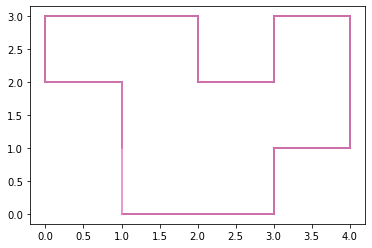

In [6]:
array = gen_rectilinear_polygon(4,5)
array

obstacle
[[2, 2], [1, 2]] [array([3, 1]), array([3, 2])] []


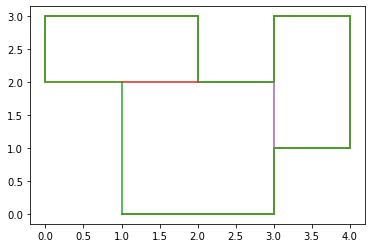

<Figure size 360x360 with 0 Axes>

In [7]:
D = decomposition()

D.get_decomposed_graph(array)